In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

%matplotlib inline

In [2]:
plt.rcParams['figure.figsize'] = (8, 6) # set default figure size, 8in by 6in

# Introduction to scikit-learn and statsmodels ML Libraries


In this lecture we will do a quick introduction to using the scikit-learn and the statsmodels
libraries for training and testing with some basic machine learning models.  Since we have looked
at building linear and logistic regression by hand, and we hopefully understands the basics of how
we train and fit models with a set of data, it may now be useful to look at using standard machine
learning libraries to build, test and train these types of models on some data.

For this lecture I have used multiple sources as inspiration and reference to build some examples.
You might want to look through some of these on your own for more details of using scikit-learn
and statsmodels for ML modeling:

[A Beginners guide to Linear Regression in Python with Scikit-Learn](https://towardsdatascience.com/a-beginners-guide-to-linear-regression-in-python-with-scikit-learn-83a8f7ae2b4f)

[Use statsmodels to Perform Linear Regression in Python](https://datatofish.com/statsmodels-linear-regression/)

[Logistic Regression using Python and scikit-learn](https://towardsdatascience.com/logistic-regression-using-python-sklearn-numpy-mnist-handwriting-recognition-matplotlib-a6b31e2b166a)

Geron, A. (2017).  "Hands-On Machine Learning with Scikit-Learn & TensorFlow", Chapter 4: Training Models

[Introducing scikit-learn](https://jakevdp.github.io/PythonDataScienceHandbook/05.02-introducing-scikit-learn.html)

# scikit-learn Python Machine Learning Library

There are several Python libraries which provide solid implementations of a range of machine learning algorithms.
One of the best known is [scikit-learn](https://scikit-learn.org/stable/), a package that provides efficient
versions of a large number of common algorithms. Scikit-Learn is characterized by a clean, uniform, and
streamlined API, as well as by very useful and complete online documentation. A benefit of this uniformity
is that once you understand the basic use and syntax of Scikit-Learn for one type of model, switching to
a new model or algorithm is very straightforward.


## Data Representation in Scikit-Learn

Scikit-learn represents all data as a table.  scikit-learn was built before the Pandas library was developed,
and originally expected and worked exclusively with NumPy arrays only (you will see many/most tutorials
and examples still put the data into NumPy arrays for training with scikit-learn).  However, as of vresion
0.20 of scikit-learn, the library also understands the Pandas dataframe natively, so either can be used.

For supervised learning, scikit-learn usually works with a feature matrix, named x or X traditionally, and
a target vector named y.  The layout of the feature matrix and target matrix are summarized in this diagram:

<img src="../../figures/fig-samples-features.png">

## Basics of scikit-learn API

Most commonly, the steps in using the scikit-learn estimator API are as follows:

1. Arrange data into a features matrix and target vector following the discussion above.
2. Choose a class of model by importing the appropriate estimator class from scikit-learn
3. Choose model hyperparameters by instantiating this class with descired values.
4. Fit the model to your data by calling the `fit()` method of the model instance.
5. Apply the model to the new data:
   - For supervised learning, often we predict labels for unknown data using the `predict()` method.
   - For unsupervised learning, we often transform or infer properties of the data using the
     `transform()` or `predict()` method.

## Linear regression with scikit-learn

Lets look at the basic steps just outlined to create and fit a linear regression model on a set
of (relatively) complex data.

### Arrange data into a features matrix and target vector

We will use a more complex housing dataset available at
[Kaggle](https://www.kaggle.com/vedavyasv/usa-housing/data#USA_Housing.csv),
similar to the example we were using
in our previous notebooks, to predict house selling prices.  This data is multivariate, so we have
features for the number of rooms and bedrooms, house age, etc.  There are 5000 samples in this
housing dataset that we can use for training and testing of our models.

In the next few cells, we load the data, do a little bit of data exploration and visualization
so that you can see some of the properties of the data set, and split the data into
a feature matrix X and target vector y.  We leave X and y as Pandas dataframes, as we are
using a version of scikit-learn that now understands dataframes natively.

In [3]:
# load the housing data into a single dataframe, both the features and the target values
# will be in the initial dataframe
df = pd.read_csv('../../data/USA_Housing.csv')

In [4]:
# preliminary description of all of the data
df.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


In [5]:
# all of the columns
df.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

In [6]:
# some information about the data we just loaded
display(df.info())

# display first 5 rows/features of the dataframe
display(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


None

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


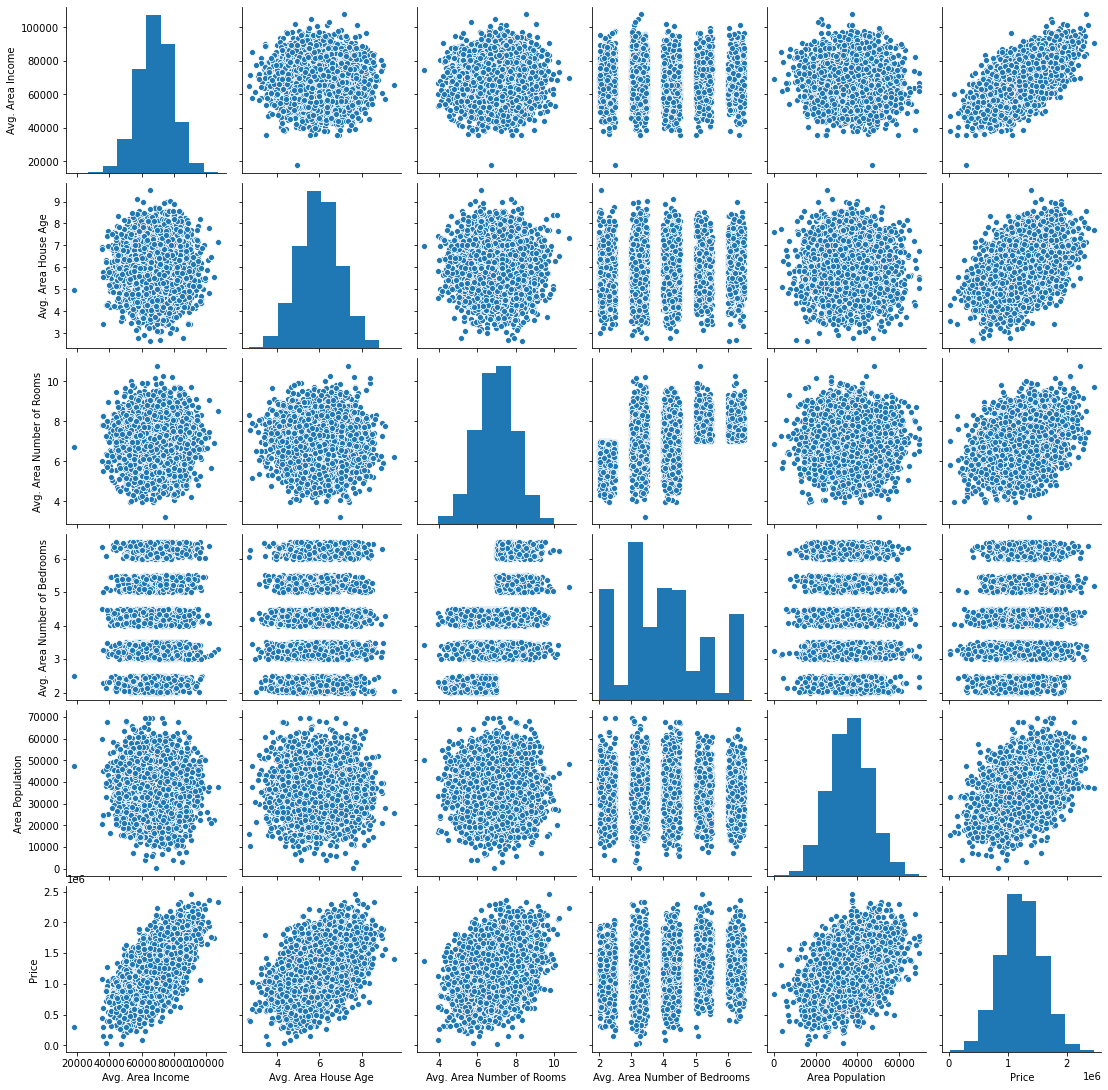

In [7]:
# some more data exploration, use seaborn to see if any of the features are highly correlated
# by doing a pairplot
sns.pairplot(df);

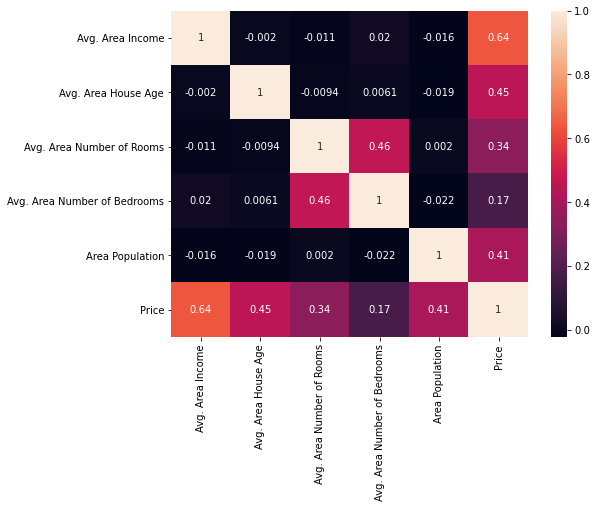

In [8]:
# actually a heatmap of the correlation of the features might be more useful, here we can see that
# Avg. Area income and price are most highly correlated, followed by the house age and population
sns.heatmap(df.corr(), annot=True);

We need to do some simple data cleaning here.  We will create a feature matrix named X.  X should not
have the Price feature, as this will be the target we want to predict.  Also the Address data we
have, while it could be used to create a more usable feature (for example if we fetched gps coordinates
associated with the address), we will simply drop here as the textual information would take
some transformation to turn into a feature that would be useful to train with.

In [12]:
# selection of features, create feature matrix X
X = df.drop(['Price', 'Address'], axis=1)
X.columns

# I might also usually clean this data by giving the feature names something more programming
# oriented (remove punctuation and spaces, for example), if needed to do a lot of work/logic
# with them, but it is not necessary here for the following example

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population'],
      dtype='object')

In [11]:
# the target vector y is simply the house prices we want to predict
y = df['Price']
y.describe()

count    5.000000e+03
mean     1.232073e+06
std      3.531176e+05
min      1.593866e+04
25%      9.975771e+05
50%      1.232669e+06
75%      1.471210e+06
max      2.469066e+06
Name: Price, dtype: float64

### Choose LinearRegreession model class

Here we need to simply be familiar with the types of supervised models scikit-learn has available, and
import the appropriate modeling class for use.  Traditionally we simply use a `from x import y`
python statement.  Linear versions of linear regression and logistic regression are available in the
`sklearn.linear_model` namespace of scikit-learn:

In [13]:
# 2 Choose a class of model by importing appropriate estimator class
from sklearn.linear_model import LinearRegression

### Instantiate Model with Hyperparameters

For a simple `LinearRegression()` model the default parameters used by scikit-learn should be sufficient.
By default scikit-learn will add an intercept feature and fit the regression line using this dummy
feature. There are other hyperparameters as well, we will later see an example of specifying them
when we instantiate a model.  But take a look at the contextual help.  Maybe read about the solver and
also the penality parameters available here.

In [14]:
# 3 Choose model hyperparameters by instantiating this class with descired values.
model = LinearRegression()

### Fit (train) the Model

In many contexts ML practioners talk of training the model.  In scikit-learn the step where we call the
`fit()` function to fit the model using the feature samples to the target values represents this training
step.  We have already instantiated an instance of a LinearRegression model in the previous cell, so all we
need to do to train the model on our data is call the `fit()` member function of our linear regression model
object.

In [15]:
# 4. Fit the model to your data by calling the fit() method of the model instance.
model.fit(X, y)

LinearRegression()

### Apply and Evaluate the Model Fit

The final step is to use the model.  We also often want to evaluate how well the model is doing in
fitting our data (more on that in the next section).

First of all, since this is a multivariate data set, it is not possible to visualize the fit as a line.
We can still display the set of fitted parameters that the model found for this data set, if we wish:

In [16]:
# the .coef_ holds an array of the coefficients
display(model.coef_)

# the .intercept_ holds the fitted intercept parameter
display(model.intercept_)

# the order of the parameters will be the same as the order of the columns in the
# feature matrix.  We can create a pandas dataframe to display the coefficients with the
# corresponding columns
coeff = pd.DataFrame(model.coef_, X.columns, columns=['coefficients'])
display(coeff)

array([2.15780494e+01, 1.65637027e+05, 1.20659949e+05, 1.65113905e+03,
       1.52007439e+01])

-2637299.0333285965

,coefficients
Avg. Area Income,21.578049
Avg. Area House Age,165637.026941
Avg. Area Number of Rooms,120659.948816
Avg. Area Number of Bedrooms,1651.139054
Area Population,15.200744


Even though the data is multivariate and thus we can't visualize the hyperplane described by the
coefficients, we can measure the performance of the model in several ways.  One visualization we can do is
to compare the predicted prices from the model to the actual prices as a plot.  The more straight and
compact this visualization is, the better the model is performing, and the more diffuse the worse the fit.

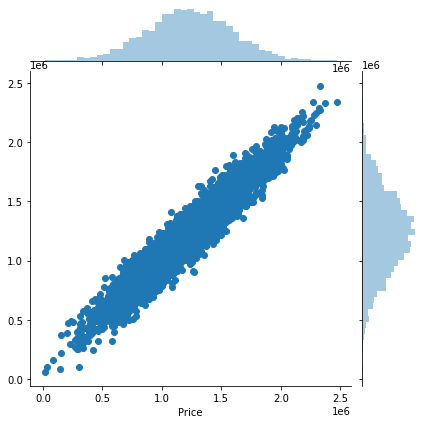

In [17]:
predictions = model.predict(X)

# visualize the predictions, perfect predictions would show as
# a perfectly line, the less line-like this correspondence between
# the predicted and actual price, the worse the model is performing
sns.jointplot(y, predictions);

As we have discussed briefly, a better way to evaluate a more complex ML model is to split the data
into testing and training data.  We then train (fit) the model on the training data, and we evaluate
its generalization and predictive performance on the test data.  For a linear model doing regression, we can use
various evaluation metrics, like the root mean squared error, and check if the performance on the
test data seems to be signifincatly worse than for the trainig data.

So lets redo all of the previous steps to fit a model, but we will first split our data into 
training and test sets, so that we can evaluate the model performance better with data that it was
not trained with.

In [18]:
# use method from scikit-learn that does the work of splitting data into test and train sets for us
from sklearn.model_selection import train_test_split

# split the data, hold back 30% for the test data, and use 70% for the training/fit.
# The train_test_split() function selects the samples at random to put in each of the
# 2 sets. By specifying a random_state here, this acts like a seed for the random number
# generator, so we will always get the same random split from the next line of code
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# for a 70/30 split we expect 3500 samples in the training data, and 1500 in the test data
display(X_train.shape)
display(y_train.shape)
display(X_test.shape)
display(y_test.shape)


(3500, 5)

(3500,)

(1500, 5)

(1500,)

In [19]:
# create a new model and fit it with only training data
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

Now we can evaluate the performance of the model on the held back test data.  First of all we can
visualize again the predictions on the test data to the true price like we did before.

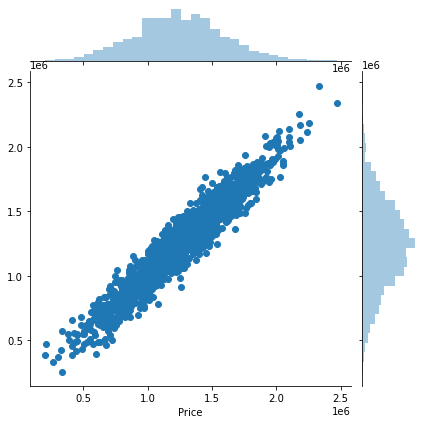

In [20]:
predictions = model.predict(X_test)

# visualize predictions on test data against the true house prices
sns.jointplot(y_test, predictions);

Comparing this to our model using all of the data doesn't show much of a difference, but this probably isn't
too helpful.  We can calculate some metrics of the prediciton on the originall training data, and on the
unseen test data, like this.

In [21]:
# import metrics sublibrary to calculate some regression metrics
from sklearn import metrics

# calculate metrics on the predictions made using the training data
predictions = model.predict(X_train)

print('(train) Mean Absolute Error      (MAE): ', metrics.mean_absolute_error(y_train, predictions))
print('(train) Mean Squared Error       (MSE): ', metrics.mean_squared_error(y_train, predictions))
print('(train) Root Mean Squared Error (RMSE): ', np.sqrt(metrics.mean_squared_error(y_train, predictions)))

# calculate metrics on the predictions made using the held back test data
predictions = model.predict(X_test)

print()
print('(test)  Mean Absolute Error      (MAE): ', metrics.mean_absolute_error(y_test, predictions))
print('(test)  Mean Squared Error       (MSE): ', metrics.mean_squared_error(y_test, predictions))
print('(test)  Root Mean Squared Error (RMSE): ', np.sqrt(metrics.mean_squared_error(y_test, predictions)))


(train) Mean Absolute Error      (MAE):  81480.49973174931
(train) Mean Squared Error       (MSE):  10287043161.197224
(train) Root Mean Squared Error (RMSE):  101425.06180031257

(test)  Mean Absolute Error      (MAE):  81135.56609336875
(test)  Mean Squared Error       (MSE):  10068422551.401083
(test)  Root Mean Squared Error (RMSE):  100341.52954485537


This is not definitive, but the fact that the absolute and squared errors didn't increase significantly (they
actually went down a bit) when tested on unseen data is some evidence that the model predictions are working
ok and are not overfit to the data.

## Logistic regression with scikit-learn

Lets do another example using a logistic regression classification task.  The previous dataset was a regression
problem (to predict a real valued price data).  So we will use a different dataset for our logistic classification
example.  But as you will see, the framework of the scikit-learn API steps are pretty similar.

We will be using the MNIST digit data set, which is available as one of the standard data sets from 
scikit-learn.  The MNIST digit data set has been called the fruit-fly model for machine learning image
processing tasks.  This data set consists of x number of greyscale images.  The images are only 8x8 pixels.
Each image consists of a single hand written digit (like 0, 1, 2, etc.), and the label is the corresponding
digit that was written.  Since there are 10 categories in this classification task, this is an example
of a multi-class classification.  But as we will see, scikit-learn will handle the details of training
multiple classifiers for us when we build our logistic regression model.

In the next cells, we will do all of the previous steps to load the data, create and fit a logistic
regression classifiction model from scikit-learn, and then evaluate the model fit.  We will split the
data into test and training sets right from the beginning, so that we can evaluate the model performance
on our testing data.

In [22]:
# load the MNIST digits dataset from scikit-learn
from sklearn.datasets import load_digits
digits = load_digits()

In [23]:
# the digits returned is actually an object.  The feature data is in the digits.data member, and it is a numpy
# array.  Noticed that it has been flattened, there are 1797 samples, each sample is an 8x8 image, but the
# images are flattened to 1 dimenstion of 64 pixels
print("Image Data Shape", digits.data.shape)
print("Image Data type", type(digits.data))

Image Data Shape (1797, 64)
Image Data type <class 'numpy.ndarray'>


In [24]:
# the label data is in the digits.target member.  This is also a numpy array, and the label is a simple
# integer 0-9
print("Label Data Shape", digits.target.shape)
print("Lable Data type", type(digits.target))

# display the first 5 targets, notice that the targets appear to be ordered, the first 5 are samples
# of digits 0 through 4 respectively
print(digits.target[:5])

Label Data Shape (1797,)
Lable Data type <class 'numpy.ndarray'>
[0 1 2 3 4]


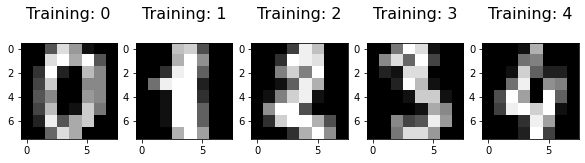

In [25]:
# just to ensure we understand the data we are classifying, lets visualize the first 4
# images and their labels

plt.figure(figsize=(10,5))

for index, (image, label) in enumerate(zip(digits.data[0:5], digits.target[0:5])):
    plt.subplot(1, 5, index + 1)
    plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)
    plt.title('Training: %i\n' % label, fontsize=16)

In [26]:
# we will split data using a 75%/25% train/test split this time
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.25, random_state=42)

In [27]:
# use LogisticRegression model with a linear regressor
from sklearn.linear_model import LogisticRegression

# make an instance of the model.  Here we specify the lbgs solver, which is the optimizer used to find
# the best parameter fit on a gradient descent.  We also specify a multinomial loss fit for our multi class
# classification
model = LogisticRegression(solver='newton-cg', multi_class='multinomial')

In [28]:
# fit the model to the training data
model.fit(X_train, y_train)

LogisticRegression(multi_class='multinomial', solver='newton-cg')

In [29]:
# again we can find out the fitted parameters and intercept, it is not too useful for multivariate
# models, except we can compare the parameters found using different libraries
# note there are 64 features, and you actually see 10x64 sets of coefficients, a set of 64 for each of the
# 10 classifiers that were trained, and there are 10 intercepts as well.
display(model.coef_)
display(model.intercept_)

array([[ 0.00000000e+00, -6.88070998e-03, -1.21279938e-02,
         5.90881797e-02,  1.69490955e-02, -7.87693601e-02,
        -1.33059794e-01, -3.15524480e-02, -9.86538226e-07,
        -6.51560053e-02, -1.95609759e-02,  1.43621392e-01,
         4.37599273e-03,  4.22619649e-02, -6.38071004e-02,
        -2.87029110e-02, -1.94679258e-03,  7.30989584e-03,
         7.00980987e-02, -5.36833753e-02, -3.43332592e-01,
         1.44874572e-01,  9.30711916e-03, -7.28579922e-03,
        -9.73397912e-04,  9.99993354e-02,  1.35748203e-01,
        -9.63907545e-02, -4.18432149e-01,  5.18837691e-02,
         6.17420315e-02, -5.73575320e-06,  0.00000000e+00,
         1.23751984e-01,  4.20176879e-02, -1.04199245e-01,
        -3.38861856e-01,  2.93981976e-02,  5.09652785e-02,
         0.00000000e+00, -1.02461643e-05, -5.79932584e-02,
         2.56376563e-01, -1.75117100e-01, -1.62222748e-01,
         9.58267618e-02,  2.41539499e-02, -1.87820207e-06,
        -4.16502965e-05, -1.16981947e-01,  1.44885947e-0

array([ 3.48033516, -5.64866674,  0.94159886, -0.55051581, 14.0983933 ,
       -9.28044921,  0.51198664,  4.0221337 ,  1.90493572, -9.47975162])

In [30]:
# predict the labels for our training data
predictions = model.predict(X_train)

# the score for a LogisticRegression model is basically the accuracy, the number of predicted classes that
# were correct (same as the given label).  Here we are computing the accuracy on our training data
score = model.score(X_train, y_train)
print("training accuracy", score)

training accuracy 1.0


In [31]:
# now the real test, predict the labels for our test data
predictions = model.predict(X_test)

# and see what accuracy we achieve using this model
score = model.score(X_test, y_test)
print('testing accuracy', score)

testing accuracy 0.9733333333333334


In [32]:
# for a classification task, it can be useful to look at the so called confussion matrix.  This is
# a table the correct or actual label (the rows) to the predicted label.  We can see how
# often a 5 was mislabeled as a 7, for example.  scikit-learn metrics has a simple
# method to create a numpy array of the confusion matrix
cm = metrics.confusion_matrix(y_test, predictions)
print(cm)

[[43  0  0  0  0  0  0  0  0  0]
 [ 0 36  1  0  0  0  0  0  0  0]
 [ 0  0 38  0  0  0  0  0  0  0]
 [ 0  0  0 44  0  1  0  0  1  0]
 [ 0  2  0  0 53  0  0  0  0  0]
 [ 0  0  0  0  0 57  1  0  0  1]
 [ 0  0  0  0  0  1 44  0  0  0]
 [ 0  0  0  0  0  1  0 40  0  0]
 [ 0  0  0  0  0  1  0  0 37  0]
 [ 0  0  0  1  0  0  0  0  1 46]]


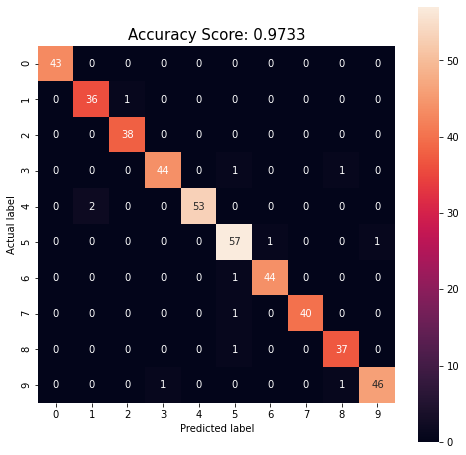

In [33]:
# we can use an sns heatmap to make a more presentable table
plt.figure(figsize=(8,8))
sns.heatmap(cm, annot=True, fmt=".0f", square=True)
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
title = 'Accuracy Score: %0.4f' % score
plt.title(title, size=15);

# statsmodels Python Statistical Analysis Library

As its name implies, statsmodels is a Python library built specifically for statistics. Statsmodels
is built on top of NumPy, SciPy, and matplotlib, but it contains more advanced functions for statistical
testing and modeling that you won't find in numerical libraries like NumPy or SciPy.

The statsmodels library is not build as a Machine Learning library.  Thus its main purpose is not really
to build predictive models to use in systems.  The statsmodels library is more like a statistics package
used for statistical analysis, such as SPSS , JASP or the R language.

One main reason I might use statsmodels, especailly for a linear or logistic regression, is if I need a
more detailed statistical analysis of the fit of my model to the data.  statsmodels provides statistical
summary information of linear and logistic regression that can be used to better understand how well
you model fits and explains the data.

## Linear regression with statsmodels

The statsmodels library works with tables of data representing the feature matrix X and target vector y.
Most all of the statsmodels library API is accessed through a sublibrary with that name, and by convention
the short name sm is used as shorthand for the statsmodels API access.


In [34]:
# statsmodels has an api, it is often imported as sm by convention like this
import statsmodels.api as sm

We are going to redo the linear regression that we did above using scikit-learn but this time using
statsmodels.  We first reload the housing data into X and y pandas data frames (skipping the visualizations
of the data this time).

In [35]:
# load the housing data into a single dataframe, both the features and the target values
# will be in the initial dataframe
df = pd.read_csv('../../data/USA_Housing.csv')

# feature matrix, drop Address as unused feature, and also drop Price which is our target
X = df.drop(['Price', 'Address'], axis=1)

# target vector consisting only of the house price we want to predict
y = df['Price']

Unlike the scikit-learn library, statsmodels will not automatically add the intercept feature to the 
feature matrix, so we need to add in a column of 1 data to represent our intercept feature before
we fit the model.

In [36]:
X = sm.add_constant(X)

Now as with scikit-learn we want a linear regression model.  The statsmodels package calls this an OLS model,
which stands for Ordinary Least Squares.  If you recall, the cost function we used for linear regression we
took the scare of the difference between the prediction and label value, and we minimized this cost.  Least
squares is another name for this type of cost function, where we square the difference and then try and find
the minimum or least cost set of parameters.

The API is slightly different for statsmodels.  Instead of specifying the data when we fit the model, we need to
spcify the data when we create the model instance object.  **NOTE**: also notice that the y and X (target
and feature matrix) are swapped in order from what I would think of as a more expected or natural order.
We can also specify metaparameters when creating the
instance object, like we did before, but here again we will use the defaults for the OLS model.

In [37]:
# Instantiate an Ordinary Least Squared (OLS) model, which implements linear regression using
# squared difference cost function
ols = sm.OLS(y, X)

For statsmodels we still need to fit the data by calling a fit function.  The result is the actuall fitted model,
but this is different from the instance method.  So I usually call the previous instance something else, then
name the result after the fit as my model.

In [38]:
model = ols.fit()

We can look at the fitted parameters, using the `.params` member variable from the model.  For a
OLS/Linear Regression both scikit-learn and statsmodels appear to be using the same optimizer, so if
you compare the fitted parameters here with those found by scikit-learn you will find they are the
same fit.  For reference, here were the intercept (const) and the coefficients from
scikit-learn:

intercept:
-2637299.0333281267

coefficients:
array([2.15780494e+01, 1.65637027e+05, 1.20659949e+05, 1.65113905e+03,
       1.52007439e+01])


In [39]:
model.params

const                          -2.637299e+06
Avg. Area Income                2.157805e+01
Avg. Area House Age             1.656370e+05
Avg. Area Number of Rooms       1.206599e+05
Avg. Area Number of Bedrooms    1.651139e+03
Area Population                 1.520074e+01
dtype: float64

We can get a statististical summary of the fit of our linear model to the data.  This gives us a
standard R-squared measure and other information.  For example, in the table at the bottom,
information is given for each of the fitted parameters.  The [0.025 0.975], for example,
provides a 95% confidence interval for each parameter.  We are 95% confident given the data
that the true value of the parameter is somewhere between the lower and upper bounds shown
here.

Another important measure shown in this table is the P>|t| measure, which is a P-value
measure of each coefficient.  You can think of this measure as how surprising this parameter
fit would be if in fact there was not relationship between the data and this parameter.
Low values mean we are not surprised, and a P<0.05 is often used as a cutoff.  So for this
linear regression, all of the parameters except for the number of bedrooms have a P-value
of essentially 0.  This means we would be surprised if there was no actual correlation between
these features and the house price.  The number of bedrooms has a P-value of 0.207.  This
means this parameter is not so good, given this data we would not be so surprised to learn that
the number of bedrooms does not correlate to house price.

In [40]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.918
Method:                 Least Squares   F-statistic:                 1.119e+04
Date:                Thu, 03 Sep 2020   Prob (F-statistic):               0.00
Time:                        14:18:21   Log-Likelihood:                -64714.
No. Observations:                5000   AIC:                         1.294e+05
Df Residuals:                    4994   BIC:                         1.295e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                        -2.637e+06   1.72e+04   -153.708      0.000   -2.67e+06    -2.6e+06
Avg. Area Income                21.5780      0.134    160.656      0.000      21.315      21.841
Avg. Area House Age           1.656e+05   1443.413    114.754      0.000    1.63e+05    1.68e+05
Avg. Area Number of Rooms     1.207e+05   1605.160     75.170      0.000    1.18e+05    1.24e+05
Avg. Area Number of Bedrooms  1651.1391   1308.671      1.262      0.207    -914.431    4216.709
Area Population                 15.2007      0.144    105.393      0.000      14.918      15.483
==============================================================================
Omnibus:                        5.580   Durbin-Watson:                   2.005
Prob(Omnibus):                  0.061   Jarque-Bera (JB):                4.959
Skew:                           0.011   Prob(JB):                       0.0838
Kurtosis:                       2.847   Cond. No.                     9.40e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.4e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Logistic regression with statsmodels

Lets also redo the logistic regression example with the statsmodels library on the mnist training
data.  We are going to just get the mnist data from scikit-learn and put it into Numpy arrays so
we can use the exact same data with statsmodels.  The API then to create a logistic regression
with statsmodels will then be basically the same.  The model is named `Logit` in statsmodels for
a logistic regression, referring to the logit cost function used for this model.

So as before, we will load the data once again, and create and fit our logistic regression model
using statsmodels in the next few code cells.

In [41]:
# reload the MNIST data from scikit-learn
from sklearn.datasets import load_digits
digits = load_digits()

# we will split data using a 75%/25% train/test split this time
# the resulting X_train, X_test, etc. are numpy arrays, which are fine to use with statsmodels
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.25, random_state=42)

In [42]:
# again statsmodels does not provide or train for an intercept coefficient by default, so we add it
# to the X feature matrix by hand
print(X_train.shape)
print(X_test.shape)

# we probably could/should have done this to the whole feature matrix before our test/train split, but either
# way should be fine
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

print(X_train.shape)
print(X_test.shape)

(1347, 64)
(450, 64)
(1347, 65)
(450, 65)


In [43]:
# now we create an instance of our model object
# MNLogit is the Multi-Nomial version of Logistic regression, e.g. to handle classification with a multi-class problem
logit = sm.MNLogit(y_train, X_train)

Unfortunatly the MNIST multi-class classification has trouble converging.  Obviously scikit-learn logistic
regression for a multinomial multi-class logistic regression may be doing something different by default with
the solver, as it converges using this same set of data, and using the newton-cg method.

The non-convergence here is probably related to the issue discussed here:
[MNLogit in statsmodel returning nan](https://stackoverflow.com/questions/31507396/mnlogit-in-statsmodel-returning-nan)


We do achieve perfect separation in the logistic regression model in scikit-learn, so it is likely we are getting
a similar result, just statsmodels doesn't warn or ignore convergence issues with the solver and silently returns
parameters that do separate the classes.

In [44]:
model = logit.fit(method='ncg')

         Current function value: 0.000001
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Hessian evaluations: 35


/opt/anaconda3/envs/python3-datasci/lib/python3.6/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/opt/anaconda3/envs/python3-datasci/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [ ]:
# When model does not converge, summary method doesn't work here
#model.summary()

statsmodel does not have a `score()` method, but we can implement our own score to calculate accuracy.

We will use the np.argmax() function to find the highest probability, convert this to the category
label, then use this to calculate accuracy here.

In [45]:
# The predict returns a vector of 10 values which is the probability for each class in the
# prediction,  for example, here is the prediction for training example 0, which was of 
# category 5
pred_probs = model.predict(X_train)
print(pred_probs.shape)
print(pred_probs[0])
print(y_train[0])

(1347, 10)
[3.35138142e-13 1.03301485e-18 2.14699418e-54 1.35419989e-39
 3.47835322e-14 9.99999072e-01 7.71867744e-07 1.55729477e-07
 8.89931267e-39 5.54302424e-51]
5


In [46]:
def prob_to_category(pred_probs):
    """We expect a samples X 10 shaped numpy array of prediction probabilities for the
    10 categories.  We return a samples x 1 shaped vector of the corresponding category label
    """
    return np.argmax(pred_probs, axis=1)

In [47]:
def score(pred, y):
    """Given a vector of predictions and a a vector of correct labels y,
    determine the score or prediction accuracy.
    """
    n = y.shape[0] # number of samples
    correct_labels = (pred == y)
    
    # return the accuracy ration, number correct / number of samples
    return np.sum(correct_labels) / n

In [48]:
# predict the labels for our training data
pred_probs = model.predict(X_train)
predictions = prob_to_category(pred_probs)

# the score for a statsmodels logistic regressor
accuracy = score(predictions, y_train)
print("training accuracy", accuracy)

training accuracy 1.0


In [49]:
# predict the labels for our test data
pred_probs = model.predict(X_test)
predictions = prob_to_category(pred_probs)

# the score for a statsmodels logistic regressor on the testing data
accuracy = score(predictions, y_test)
print("testing accuracy", accuracy)

testing accuracy 0.9688888888888889


# Acknowledgements and Versions

In [50]:
import sys
sys.path.append("../../src") # add our class modules to the system PYTHON_PATH

from ml_python_class.custom_funcs import version_information
version_information()

              Module   Versions
--------------------   ------------------------------------------------------------
              numpy:   ['1.18.5']
             pandas:   ['1.0.5']
            seaborn:   ['0.10.1']
    statsmodels.api:   ['0.11.1']
